In [ ]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta


# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion

In [43]:
symbols = ['BTCUSDT', 'ETHUSDT']
start_time = dt.datetime(2024, 1, 1)
end_time = dt.datetime(2024, 2, 1)
timeframe = '1h'
data = Data(symbols, timeframe, start_time, end_time).df

In [44]:
data

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  
date                coin                        
2023-12-31 19:00:00 BTCUSDT       5.401495e+07  
                    ETHUSDT       2.472705e+07  
2023-12-31 20:00:00 BTCUSDT       5.098195e+07  
                    ETHUSDT       1.938218e+07  
2023-12-31 21:00:00 BTCUSDT       2.917741e+07  
...                                        ...  
2024-01-31 16:00:00 ETHUSDT       5.244271e+07  
2024-01-31 17:00:00 BTCUSDT       5.964677e+07  
                    ETHUSDT       2.368532e+07  
2024-01-31 18:00:00 BTCUSDT       5.356257e+07  
                    ETHUSDT       2.200149e+07  

[1488 rows x 9 columns]

In [45]:
#Perform coarse analysis and filtering
coarse = Coarse()

In [46]:
df = coarse.volume_flag(data, 1000)
df

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  
date                coin                                     
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  
                    ETHUSDT       2.472705e+07            1  
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  
                    ETHUSDT       1.938218e+07            1  
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  
...                                        ...          ...  
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  
                    ETHUSDT       2.368532e+07            1  
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  
                    ETHUSDT       2.200149e+07            1  

[1488 rows x 10 columns]

In [47]:
df = coarse.sort_by_volume(df)
df

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  volume_rank  
date                coin                                                  
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0  
                    ETHUSDT       2.472705e+07            1          1.0  
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0  
                    ETHUSDT       1.938218e+07            1          1.0  
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0  
...                                        ...          ...          ...  
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1          1.0  
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1          2.0  
                    ETHUSDT       2.368532e+07            1          1.0  
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1          2.0  
                    ETHUSDT       2.200149e+07            1          1.0  

[1488 rows x 11 columns]

In [48]:
df = coarse.sort_by_std(df, 2, 2)
df.head()

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   

                             volume_in_dollars  volume_flag  volume_rank  \
date                coin                                                   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0   
                    ETHUSDT       2.472705e+07            1          1.0   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0   
                    ETHUSDT       1.938218e+07            1          1.0   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0   

                             std_values  std_rank  
date                coin                           
2023-12-31 19:00:00 BTCUSDT         NaN       NaN  
                    ETHUSDT         NaN       NaN  
2023-12-31 20:00:00 BTCUSDT    0.002299       2.0  
                    ETHUSDT    0.002524       1.0  
2023-12-31 21:00:00 BTCUSDT    0.000539       2.0

In [49]:
fine = Fine()

In [50]:
df = fine.above_ema(df, 2)

In [51]:
df

close  creturns      high  log_return  \
date                coin                                                
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                coin                                                 
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  volume_rank  \
date                coin                                                   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0   
                    ETHUSDT       2.472705e+07            1          1.0   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0   
                    ETHUSDT       1.938218e+07            1          1.0   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0   
...                                        ...          ...          ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1          1.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1          2.0   
                    ETHUSDT       2.368532e+07            1          1.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1          2.0   
                    ETHUSDT       2.200149e+07            1          1.0   

                             std_values  std_rank         ema_2  above_ema  
date                coin                                                    
2023-12-31 19:00:00 BTCUSDT         NaN       NaN           NaN          0  
                    ETHUSDT         NaN       NaN           NaN          0  
2023-12-31 20:00:00 BTCUSDT    0.002299       2.0  42544.395000          1  
                    ETHUSDT    0.002524       1.0   2299.615000          1  
2023-12-31 21:00:00 BTCUSDT    0.000539       2.0  42568.865000          1  
...                                 ...       ...           ...        ...  
2024-01-31 16:00:00 ETHUSDT    0.002781       1.0   2286.486103          0  
2024-01-31 17:00:00 BTCUSDT    0.002806       1.0  42637.722258          1  
                    ETHUSDT    0.002091       2.0   2285.995368          0  
2024-01-31 18:00:00 BTCUSDT    0.001262       1.0  42599.240753          0  
                    ETHUSDT    0.000808       2.0   2284.091789          0  

[1488 rows x 15 columns]

In [52]:
#Generate a signal
tf = Trend_Following()
mr = Mean_Reversion()

In [53]:
str_length = 10
str_mult = 3
_df = tf.supertrend_signals(df, str_length, str_mult)
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  volume_rank  \
date                                                                       
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1          2.0   
                    ETHUSDT       2.472705e+07            1          1.0   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1          2.0   
                    ETHUSDT       1.938218e+07            1          1.0   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1          2.0   
...                                        ...          ...          ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1          1.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1          2.0   
                    ETHUSDT       2.368532e+07            1          1.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1          2.0   
                    ETHUSDT       2.200149e+07            1          1.0   

                             std_values  std_rank         ema_2  above_ema  \
date                                                                         
2023-12-31 19:00:00 BTCUSDT         NaN       NaN           NaN          0   
                    ETHUSDT         NaN       NaN           NaN          0   
2023-12-31 20:00:00 BTCUSDT    0.002299       2.0  42544.395000          1   
                    ETHUSDT    0.002524       1.0   2299.615000          1   
2023-12-31 21:00:00 BTCUSDT    0.000539       2.0  42568.865000          1   
...                                 ...       ...           ...        ...   
2024-01-31 16:00:00 ETHUSDT    0.002781       1.0   2286.486103          0   
2024-01-31 17:00:00 BTCUSDT    0.002806       1.0  42637.722258          1   
                    ETHUSDT    0.002091       2.0   2285.995368          0   
2024-01-31 18:00:00 BTCUSDT    0.001262       1.0  42599.240753          0   
                    ETHUSDT    0.000808       2.0   2284.091789          0   

                             SUPERT_10_3.0  SUPERTd_10_3.0  SUPERTl_10_3.0  \
date                                 

In [ ]:
condition = _df[f'SUPERTd_{str_length}_{float(str_mult)}'] == 1
_df['position'] = np.where(condition, 1, 0)
_df['position'] = _df['position'].shift(len(_df.index.get_level_values(1).unique())).fillna(0)
_df = Calculations().strategy_returns(_df)
_df = Calculations().trades(_df)
_df = Calculations().sessions(_df)
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  ...   
                    ETHUSDT       2.472705e+07            1  ...   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  ...   
                    ETHUSDT       1.938218e+07            1  ...   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             SUPERT_10_3.0  SUPERTd_10_3.0  SUPERTl_10_3.0  \
date                                                                         
2023-12-31 19:00:00 BTCUSDT       0.000000               1             NaN   
                    ETHUSDT       0.000000               1             NaN   
2023-12-31 20:00:00 BTCUSDT            NaN               1             NaN   
                    ETHUSDT            NaN               1             NaN   
2023-12-31 21:00:00 BTCUSDT            NaN               1             NaN   
...                                    ...             ...             ...   
2024-01-31 16:00:00 ETHUSDT    2346.264505              -1             NaN   
2024-01-31 17:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   
2024-01-31 18:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   

                             SUPERTs_10_3.0  position  strategy  trades  \
date                                                                      
2023-12-31 19:00:00 BTCUSDT             NaN       0.0       NaN     0

---

We need a:

1. Normalized Trailing Stop Loss 
2. Normalized Fixed Stop Loss 
3. Same as the above for take profit

Normalized means: based on volatility or another indicator (or metric)

## Stop Loss

### Fixed Stop Loss (Based on indicator)

Logic:

1. Add sessions: Make group sessions column that identifies each time we have a trade. (so trade #1, 2, 3, ...)
2. Add session Returns: For each group session, calculate the strategy returns for each given session.
3. For each beginning of a session calculate the stop loss price (provide a new column) -> ffill() until the end of a session OR you could use .transform('first')
4. For each beginning of a session calculate the take profit price (provide a new column) -> ffill() until the end of a session OR you could use .transform('first')
5. For each session, check if any of the low prices goes below stop loss or high prices goes above take profit -> make a new position column that indicates a 0 whenever we exit a trade by a stop loss (for the rest of the column), 0.5 whenever we exit by a take profit and 1 when a position is still on.
6. Recalculate all columns that requires the position column to be calculated. (see in the cells below)


Note: The same process applies for fixed percentage stop loss. We could treat the fixed stop loss as a column with constant values instead of changing values.
Practically, we have to convert all the stop losses relative to the entry price (most likely the closing price), so if the stop loss is 2%, then for each row, we take price * (1 - 0.02). Then for each session, we just look for when the stop loss gets hit and close the position (making it = 0), and recompute all the necessary information.


In [55]:
#calculate the atr indicator
atr_length = 14
for_testing = _df
_df = _df.unstack()
for coin in _df.columns.levels[1]:
    high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
    _df['atr', coin] = ta.atr(high, low, close, length=atr_length)

#### NOTE!!!!:
We have to warm up the data (getting extra data for the max length of calculations -> ex: str_length = 10, atr_length = 14, we warm up the data by atr_length) then we slice the data. 

This is to ensure that when we calculate our positions, we don't cut a current position. This will mess up our data.

Practically, we need to get the ['expected'] maximum value of the required warm up data (using the maximum needed calculations related to the data) Then we slice the data from the length of the warm up data until the end (using .iloc[warmup_data_length:])

In [19]:
_df.iloc[atr_length:]

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  trades  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ... BTCUSDT   
date                                                         ...           
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...     0.0   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...     0.0   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...     0.0   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...     0.0   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...     0.0   
...                        ...       ...       ...      ...  ...     ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...     0.0   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...     0.0   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...     1.0   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...     0.0   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...     0.0   

                            session         overall_session_return            \
                    ETHUSDT BTCUSDT ETHUSDT                BTCUSDT   ETHUSDT   
date                                                                           
2024-01-01 09:00:00     0.0     1.0     1.0               0.025563  0.023336   
2024-01-01 10:00:00     0.0     1.0     1.0               0.025563  0.023336   
2024-01-01 11:00:00     0.0     1.0     1.0               0.025563  0.023336   
2024-01-01 12:00:00     0.0     1.0     1.0               0.025563  0.023336   
2024-01-01 13:00:00     0.0     1.0     1.0               0.025563  0.023336   
...                     ...     ...     ...                    ...       ...   
2024-01-31 14:00:00     0.0    17.0    13.0              -0.021475 -0.029085   
2024-01-31 15:00:00     0.0    17.0    13.0              -0.021475 -0.029085   
2024-01-31 16:00:00     0.0    17.0    13.0              -0.021475 -0.029085   
2024-01-31 17:00:00     1.0    18.0    13.0               0.000000 -0.029085   
2024-01-31 18:00:00     0.0    18.0    14.0               0.000000  0.000000   

                    session_compound                   atr             
                             BTCUSDT   ETHUSDT     BTCUSDT    ETHUSDT  
date                                                                   
2024-01-01 09:00:00         0.000014 -0.001108  169.721566  10.174832  
2024-01-01 10:00:00         0.004031  0.004862  179.391771  11.129219  
2024-01-01 11:00:00         0.002673  0.002776  180.645360  11.323691  
2024-01-01 12:00:00         0.004730  0.004457  174.645737  11.252522  
2024-01-01 13:00:00         0.011757  0.010178  196.127177  11.907832  
...                              ...       ...         ...        ...  
2024-01-31 14:00:00        -0.003190 -0.010152  324.642

In [20]:

_df.head()

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2023-12-31 19:00:00  42475.23  2295.51       NaN       NaN  42554.57  2297.18   
2023-12-31 20:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2023-12-31 21:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2023-12-31 22:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2023-12-31 23:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   

                    log_return                 low           ...  trades  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ... BTCUSDT   
date                                                         ...           
2023-12-31 19:00:00        NaN       NaN  42261.02  2281.27  ...     0.0   
2023-12-31 20:00:00   0.003251  0.003570  42431.65  2292.90  ...     1.0   
2023-12-31 21:00:00  -0.000762 -0.004655  42500.00  2291.20  ...     0.0   
2023-12-31 22:00:00  -0.005903 -0.008413  42230.08  2271.00  ...     0.0   
2023-12-31 23:00:00   0.001640  0.002521  42209.46  2265.24  ...     0.0   

                            session         overall_session_return            \
                    ETHUSDT BTCUSDT ETHUSDT                BTCUSDT   ETHUSDT   
date                                                                           
2023-12-31 19:00:00     0.0     0.0     0.0               0.003257  0.003577   
2023-12-31 20:00:00     1.0     0.0     0.0               0.003257  0.003577   
2023-12-31 21:00:00     0.0     1.0     1.0               0.025563  0.023336   
2023-12-31 22:00:00     0.0     1.0     1.0               0.025563  0.023336   
2023-12-31 23:00:00     0.0     1.0     1.0               0.025563  0.023336   

                    session_compound               atr          
                             BTCUSDT   ETHUSDT BTCUSDT ETHUSDT  
date                                                            
2023-12-31 19:00:00              NaN       NaN     NaN     NaN  
2023-12-31 20:00:00         0.003262  0.003583     NaN     NaN  
2023-12-31 21:00:00        -0.000761 -0.004634     NaN     NaN  
2023-12-31 22:00:00        -0.006625 -0.012938     NaN     NaN  
2023-12-31 23:00:00        -0.004993 -0.010443     NaN     NaN  

[5 rows x 52 columns]

In [21]:
sl_mult = 1
_df = _df.stack(future_stack = True)
_df['stop_loss'] = _df['close'] - sl_mult * _df['atr']

In [22]:
from qgridnext import show_grid as show
show(_df['session'])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [23]:
_df = _df.unstack()
for coin in _df.columns.levels[1]:
    _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform('first')

_df

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2023-12-31 19:00:00  42475.23  2295.51       NaN       NaN  42554.57  2297.18   
2023-12-31 20:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2023-12-31 21:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2023-12-31 22:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2023-12-31 23:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2023-12-31 19:00:00        NaN       NaN  42261.02  2281.27  ...   
2023-12-31 20:00:00   0.003251  0.003570  42431.65  2292.90  ...   
2023-12-31 21:00:00  -0.000762 -0.004655  42500.00  2291.20  ...   
2023-12-31 22:00:00  -0.005903 -0.008413  42230.08  2271.00  ...   
2023-12-31 23:00:00   0.001640  0.002521  42209.46  2265.24  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    overall_session_return           session_compound  \
                                   BTCUSDT   ETHUSDT          BTCUSDT   
date                                                                    
2023-12-31 19:00:00               0.003257  0.003577              NaN   
2023-12-31 20:00:00               0.003257  0.003577         0.003262   
2023-12-31 21:00:00               0.025563  0.023336        -0.000761   
2023-12-31 22:00:00               0.025563  0.023336        -0.006625   
2023-12-31 23:00:00               0.025563  0.023336        -0.004993   
...                                    ...       ...              ...   
2024-01-31 14:00:00              -0.021475 -0.029085        -0.003190   
2024-01-31 15:00:00              -0.021475 -0.029085        -0.021276   
2024-01-31 16:00:00              -0.021475 -0.029085        -0.021276   
2024-01-31 17:00:00               0.000000 -0.029085         0.000000   
2024-01-31 18:00:00               0.000000  0.000000         0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2023-12-31 19:00:00       NaN         NaN        NaN           NaN   
2023-12-31 20:00:00  0.003583         NaN        NaN           NaN   
2023-12-31 21:00:00 -0.004634         NaN        NaN           NaN   
2023-12-31 22:00:00 -0.012938         NaN        NaN           NaN   
2023-12-31 23:00:00 -0.010443         NaN        NaN           NaN   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.010152  324.642171  19.343813  43009.997829   
2024-01-31 15:00:00 -0.025119  361.537730  20.716398  42179.642270   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  42120.632108   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  42293.665529   
202

In [24]:
_df[['session_stop_loss', 'stop_loss', 'session']]

session_stop_loss                  stop_loss               \
                              BTCUSDT      ETHUSDT       BTCUSDT      ETHUSDT   
date                                                                            
2023-12-31 19:00:00               NaN          NaN           NaN          NaN   
2023-12-31 20:00:00               NaN          NaN           NaN          NaN   
2023-12-31 21:00:00      42442.518434  2290.815168           NaN          NaN   
2023-12-31 22:00:00      42442.518434  2290.815168           NaN          NaN   
2023-12-31 23:00:00      42442.518434  2290.815168           NaN          NaN   
...                               ...          ...           ...          ...   
2024-01-31 14:00:00      43401.698784  2317.317432  43009.997829  2304.036187   
2024-01-31 15:00:00      43401.698784  2317.317432  42179.642270  2267.263602   
2024-01-31 16:00:00      43401.698784  2317.317432  42120.632108  2257.706202   
2024-01-31 17:00:00      42293.665529  2317.317432  42293.665529  2264.626474   
2024-01-31 18:00:00      42293.665529  2263.023154  42233.951562  2263.023154   

                    session          
                    BTCUSDT ETHUSDT  
date                                 
2023-12-31 19:00:00     0.0     0.0  
2023-12-31 20:00:00     0.0     0.0  
2023-12-31 21:00:00     1.0     1.0  
2023-12-31 22:00:00     1.0     1.0  
2023-12-31 23:00:00     1.0     1.0  
...                     ...     ...  
2024-01-31 14:00:00    17.0    13.0  
2024-01-31 15:00:00    17.0    13.0  
2024-01-31 16:00:00    17.0    13.0  
2024-01-31 17:00:00    18.0    13.0  
2024-01-31 18:00:00    18.0    14.0  

[744 rows x 6 columns]

In [25]:
def define_sl_pos(group, coin):
    if (group['low', coin] <= group['session_stop_loss', coin]).any():
        start = group[group['low', coin] <= group['session_stop_loss', coin]].index[0]
        stop = group.index[-2]
        group.loc[start:stop, "position"] = 0
        return group
    else:
        return group

In [26]:
for coin in _df.columns.levels[1]:
    # Group by both the session and coin, then pass the coin as an additional argument
    test = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_sl_pos(group, coin))
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2023-12-31 19:00:00  42475.23  2295.51       NaN       NaN  42554.57  2297.18   
2023-12-31 20:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2023-12-31 21:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2023-12-31 22:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2023-12-31 23:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2023-12-31 19:00:00        NaN       NaN  42261.02  2281.27  ...   
2023-12-31 20:00:00   0.003251  0.003570  42431.65  2292.90  ...   
2023-12-31 21:00:00  -0.000762 -0.004655  42500.00  2291.20  ...   
2023-12-31 22:00:00  -0.005903 -0.008413  42230.08  2271.00  ...   
2023-12-31 23:00:00   0.001640  0.002521  42209.46  2265.24  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    overall_session_return           session_compound  \
                                   BTCUSDT   ETHUSDT          BTCUSDT   
date                                                                    
2023-12-31 19:00:00               0.003257  0.003577              NaN   
2023-12-31 20:00:00               0.003257  0.003577         0.003262   
2023-12-31 21:00:00               0.025563  0.023336        -0.000761   
2023-12-31 22:00:00               0.025563  0.023336        -0.006625   
2023-12-31 23:00:00               0.025563  0.023336        -0.004993   
...                                    ...       ...              ...   
2024-01-31 14:00:00              -0.021475 -0.029085        -0.003190   
2024-01-31 15:00:00              -0.021475 -0.029085        -0.021276   
2024-01-31 16:00:00              -0.021475 -0.029085        -0.021276   
2024-01-31 17:00:00               0.000000 -0.029085         0.000000   
2024-01-31 18:00:00               0.000000  0.000000         0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2023-12-31 19:00:00       NaN         NaN        NaN           NaN   
2023-12-31 20:00:00  0.003583         NaN        NaN           NaN   
2023-12-31 21:00:00 -0.004634         NaN        NaN           NaN   
2023-12-31 22:00:00 -0.012938         NaN        NaN           NaN   
2023-12-31 23:00:00 -0.010443         NaN        NaN           NaN   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.010152  324.642171  19.343813  43009.997829   
2024-01-31 15:00:00 -0.025119  361.537730  20.716398  42179.642270   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  42120.632108   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  42293.665529   
202

Now that we have the position adjusted to account for a stop loss we need to do the following (Basically calculate (or recalculate) everything that requires the position):

1. Calculate the trades column
2. Calculate Strategy Returns (using the new changed position column)
=> Include transaction costs
3. Calculate cumulative strategy returns
4. Add sessions (rerun sessions function) again

Note that we need to the same for Take Profit (the above steps)

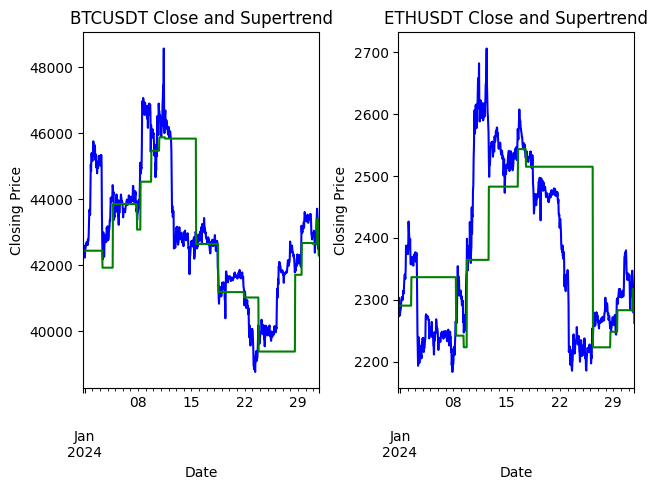

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_sl(df):
    """
    We assume an unstacked dataframe with the following columns:
    - close
    - session_stop_loss
    """


    _df = df.copy()
    # Get unique coins
    unique_coins = _df.columns.get_level_values(1).unique()

    # Determine grid dimensions
    num_coins = len(unique_coins)
    cols = 5 # You can choose the number of columns
    rows = math.ceil(num_coins / cols)

    # Create the subplots grid
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten() #this makes the axes a 1D array, so we can iterate over it without going for another loop

    # Plot each coin
    for i, coin in enumerate(unique_coins):
        _df[[['close', coin], ['session_stop_loss', coin]]].plot(
            ax=axes[i],
            title=f'{coin} Close and Stop Loss',
            color=['blue', 'green'],
            legend = None
        )
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Closing Price')
        # axes[i].legend(title='Coin')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_sl(test)


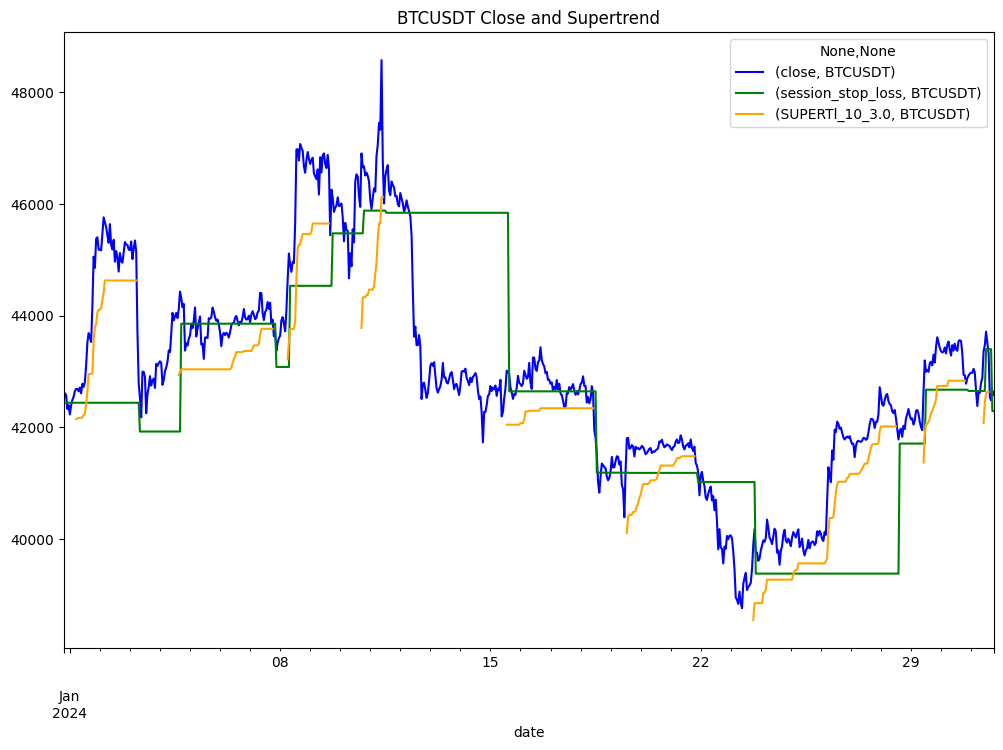

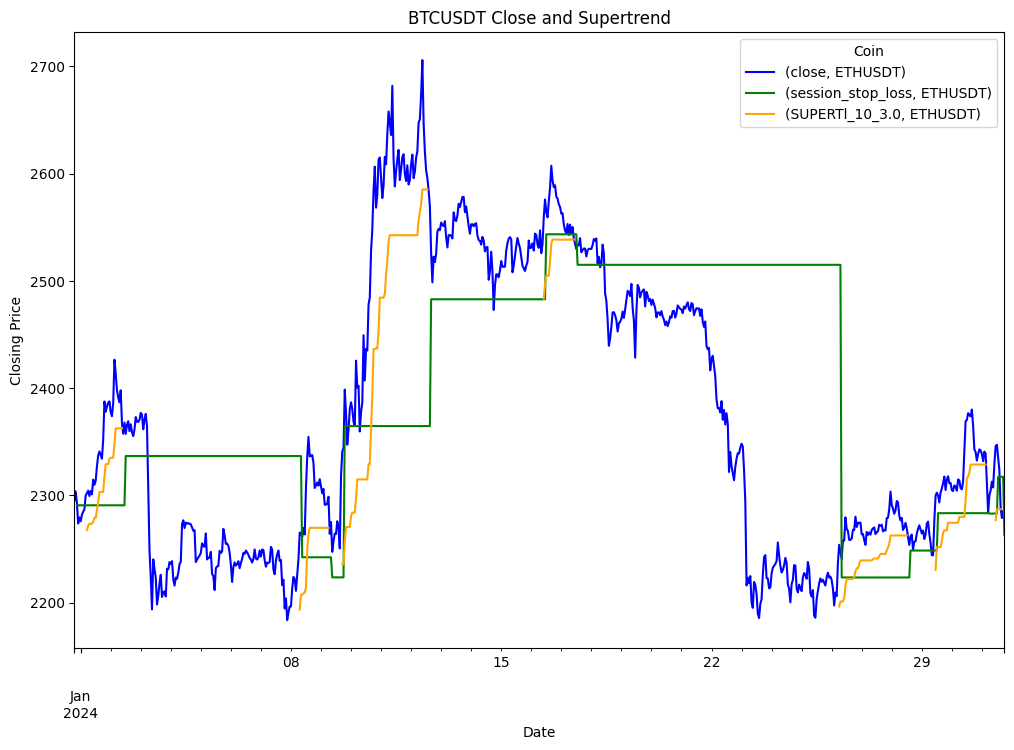

In [31]:
for coin in _df.columns.get_level_values(1).unique():
    _df[[['close', coin], ['session_stop_loss', coin], ['SUPERTl_10_3.0', coin]]].plot(figsize=(12, 8), title = 'BTCUSDT Close and Supertrend', color = ['blue', 'green', 'orange'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Coin');


Putting everything together

In [ ]:
def calculate_atr_fixed_sl(df, atr_length = 14, sl_mult = 3, plot = True):
    """
    This function applies a fixed stop loss based on the ATR indicator to the position column in the dataframe.

    Parameters:
        df: DataFrame
            The dataframe containing the data, assumes that a position column is present and sessions are already present
        atr_length: int
            The length of the ATR indicator
        sl_mult: float
            The multiplier for the ATR indicator to determine the stop loss

    """
    #unstack dataframe
    _df = df.copy().unstack()

    #Calculate the ATR indicator
    for coin in _df.columns.levels[1]:
        high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
        _df['atr', coin] = ta.atr(high, low, close, length=atr_length)

    _df = _df.iloc[atr_length:] #Slice the dataframe to remove the NaN values from the ATR calculation
    #It is better to do the above as we might get NaN values in other columns, so this might remove many needed rows
    #Note: This is done at this first stage right after we calculate all the indicators, We need to create a function in the 
        #future to remove the largest length needed for the calculations as this would be essential to warm up the data needed.
    
    #Calculate the stop loss
    _df = _df.stack(future_stack = True)
    _df['stop_loss'] = _df['close'] - sl_mult * _df['atr']

    ####Everything that comes after this is common for all fixed stop losses (percentage, dollar, indicator based, ...)#####

    #Unstack the dataframe
    _df = _df.unstack()

    #Calculate the session stop loss
    for coin in _df.columns.levels[1]:
        _df['session_stop_loss', coin] = _df['stop_loss', coin].groupby(_df['session', coin]).transform('first')
        
    #Apply the inner function to the dataframe
    for coin in _df.columns.levels[1]:
        # Group by both the session and coin, then pass the coin as an additional argument
        _df = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: define_sl_pos(group, coin))

    if plot:
        plot_sl(_df)

    return _df
         
        

def define_sl_pos(group, coin):
        if (group['low', coin] <= group['session_stop_loss', coin]).any():
            start = group[group['low', coin] <= group['session_stop_loss', coin]].index[0]
            stop = group.index[-2]
            group.loc[start:stop, "position"] = 0
            return group
        else:
            return group

    

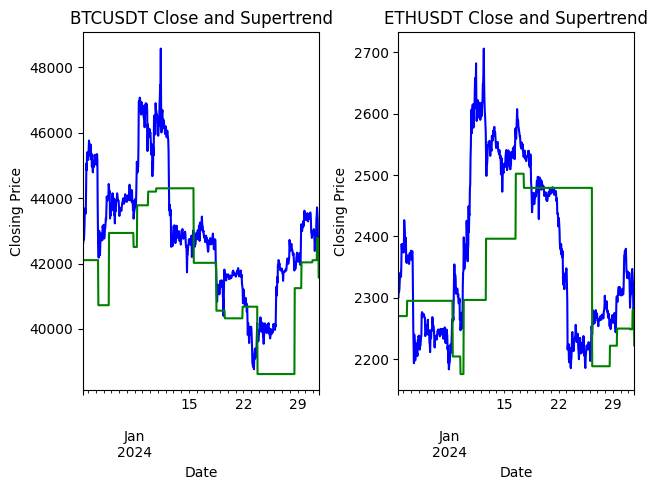

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    overall_session_return           session_compound  \
                                   BTCUSDT   ETHUSDT          BTCUSDT   
date                                                                    
2024-01-01 09:00:00               0.025563  0.023336         0.000014   
2024-01-01 10:00:00               0.025563  0.023336         0.004031   
2024-01-01 11:00:00               0.025563  0.023336         0.002673   
2024-01-01 12:00:00               0.025563  0.023336         0.004730   
2024-01-01 13:00:00               0.025563  0.023336         0.011757   
...                                    ...       ...              ...   
2024-01-31 14:00:00              -0.021475 -0.029085        -0.003190   
2024-01-31 15:00:00              -0.021475 -0.029085        -0.021276   
2024-01-31 16:00:00              -0.021475 -0.029085        -0.021276   
2024-01-31 17:00:00               0.000000 -0.029085         0.000000   
2024-01-31 18:00:00               0.000000  0.000000         0.000000   

                                      atr                stop_loss  \
                      ETHUSDT     BTCUSDT    ETHUSDT       BTCUSDT   
date                                                                 
2024-01-01 09:00:00 -0.001108  169.721566  10.174832  42103.075302   
2024-01-01 10:00:00  0.004862  179.391771  11.129219  42244.874687   
2024-01-01 11:00:00  0.002776  180.645360  11.323691  42183.213919   
2024-01-01 12:00:00  0.004457  174.645737  11.252522  42288.762788   
2024-01-01 13:00:00  0.010178  196.127177  11.907832  42522.718470   
...                       ...         ...        ...           ...   
2024-01-31 14:00:00 -0.010152  324.642171  19.343813  42360.713488   
2024-01-31 15:00:00 -0.025119  361.537730  20.716398  41456.566810   
2024-01-31 16:00:00 -0.028938  366.487892  21.293798  41387.656324   
2024-01-31 17:00:00 -0.028938  362.404471  21.123526  41568.856586   
202

In [ ]:
calculate_atr_fixed_sl(for_testing, atr_length = 14, sl_mult = 3, plot = True)

In [ ]:
#Make a wrapper class for Atr fixed stop loss where we rerun all functions dependent on the position column (trades, sessions, ...)
#This is to ensure that the trades and sessions are updated with the new stop loss values
def atr_fixed_stop_loss(df, atr_length = 14, sl_mult = 3, plot = True):
    _df = calculate_atr_fixed_sl(df, atr_length = atr_length, sl_mult = sl_mult, plot = plot)
    _df = Calculations().trades(_df)
    _df = Calculations().strategy_returns(_df)
    _df = Calculations().strategy_creturns(_df)
    _df = Calculations().sessions(_df)
    return _df

### Dynamic Indicator Stop Loss (supertrend)

1. For each grouped sessions, make a new column that calculates the supertrend indicator
2. For each session, if any of the low prices goes below the trailing stop -> Make a new position column that indicates a 0 whenever we exit a trade by a stop loss (for the rest of the column).